In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("df_working.csv")

/var/folders/_t/mfgk4xxn1hb8w2n3w5x65snw0000gp/T/ipykernel_16386/908440793.py:1: DtypeWarning: Columns (5,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_working.csv")


In [4]:
def weighted_mean(x, weight):
    return (x * weight).sum() / weight.sum()


summary_weighted = df.groupby('insurance').apply(
    lambda g: pd.Series({
        'Mean Total Cost': weighted_mean(g['total_charge'], g['person_weight']),
        'Mean Out-of-Pocket': weighted_mean(g['out_of_pocket'], g['person_weight']),
        'Mean Paid By Insurer': weighted_mean(g['COST_COVERED'], g['person_weight'])
    })
)

print(summary_weighted)

                                    Mean Total Cost  Mean Out-of-Pocket  \
insurance                                                                 
65+ Medicare + Other Public              819.462777           15.823821   
65+ Medicare + Private                   806.554945           41.200506   
65+ Medicare Only                        807.451266           40.131619   
65+ No Medicare but Public/Private       590.888647           53.383702   
65+ Uninsured                           1080.804815           95.219158   
<65 Any Private                          570.265034           70.406642   
<65 Public Only                          678.891624           13.627058   
<65 Uninsured                            569.674821          125.763535   

                                    Mean Paid By Insurer  
insurance                                                 
65+ Medicare + Other Public                   803.638955  
65+ Medicare + Private                        765.354438  
65+ Medicare 

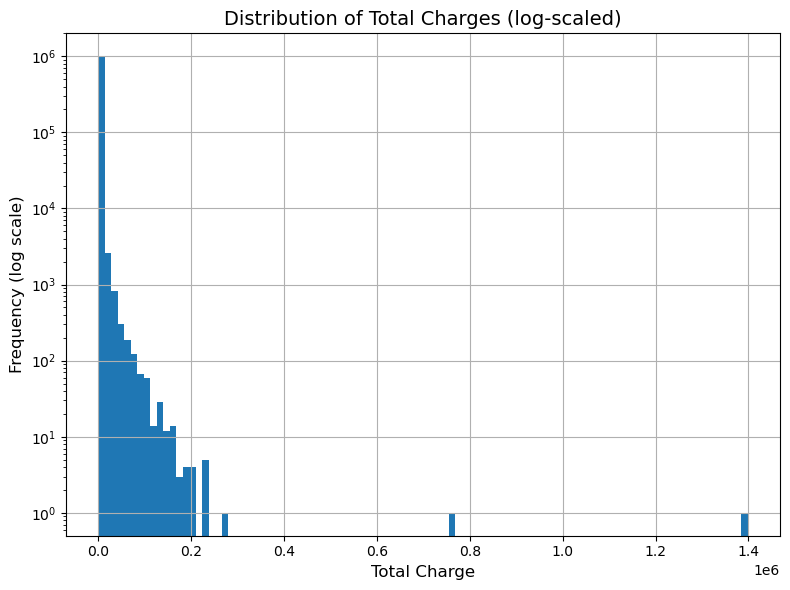

In [18]:
plt.figure(figsize=(8, 6))
df['total_charge'].hist(bins=100)
plt.yscale('log')

plt.xlabel("Total Charge", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)
plt.title("Distribution of Total Charges (log-scaled)", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

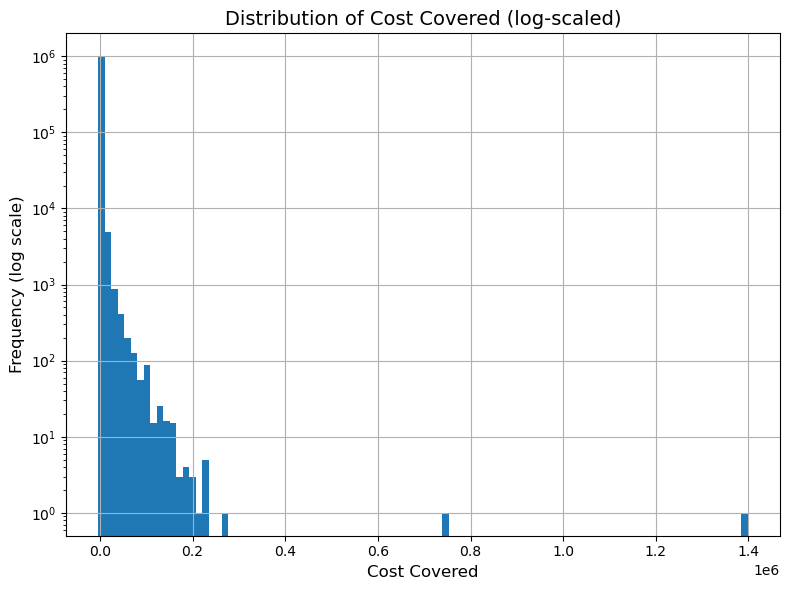

In [19]:
plt.figure(figsize=(8, 6))
df['COST_COVERED'].hist(bins=100)
plt.yscale('log')

plt.xlabel("Cost Covered", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)
plt.title("Distribution of Cost Covered (log-scaled)", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

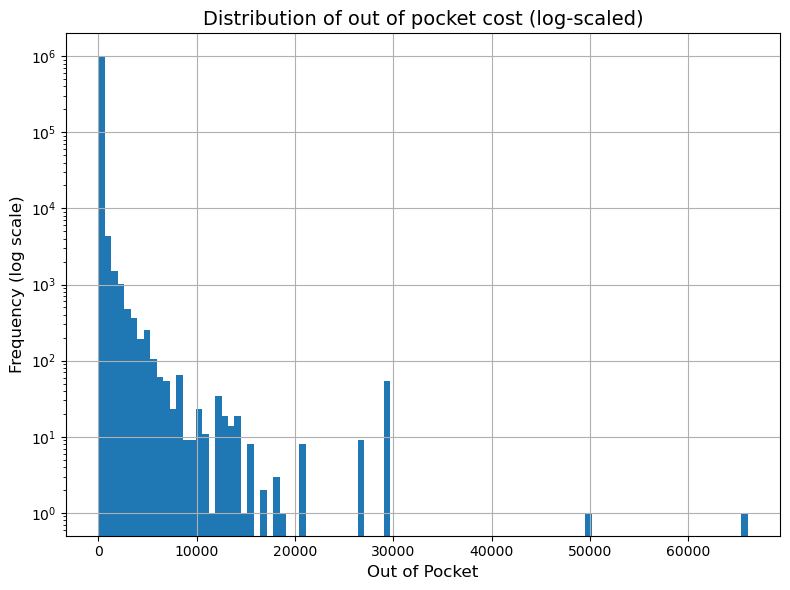

In [17]:
plt.figure(figsize=(8, 6))
df['out_of_pocket'].hist(bins=100)
plt.yscale('log')

plt.xlabel("Out of Pocket", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)
plt.title("Distribution of out of pocket cost (log-scaled)", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()